<a href="https://colab.research.google.com/github/emmenets/neuralnetwork/blob/master/190708yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import imutils


from IPython.display import display, Javascript

import os, sys
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
rm -rf /gdrive/My\ Drive/colabfiles/yolo3/

In [0]:
!mkdir /gdrive/My\ Drive/colabfiles/yolo3/

Ordner erstellen

In [4]:
cd /gdrive/My\ Drive/colabfiles/yolo3/


/gdrive/My Drive/colabfiles/yolo3


In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
def take_photo(filename='photo.jpg', quality=0.2):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  resp = urllib.request.urlopen(data)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image = imutils.resize(image, 300)

  # return the image
  return image

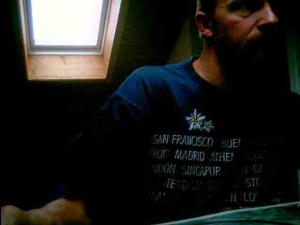

1562605845.6193862


<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [32]:
from google.colab.output import eval_js
from IPython.display import clear_output
import urllib
import time
while True:
  img = take_photo()
  img = imutils.rotate(img, 180)
  clear_output()

  cv2_imshow(img)
  print(time.time())
  time.sleep(0.1)

In [0]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]
  
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
  
print(classes)

img = cv2.imread("person.jpg")
height, width, channels = img.shape


blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

#showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      #object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      cv2.circle(img, (center_x, center_y), 10, (0,0,255), -1)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
      
      #Rectangle Coordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)
            
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
      
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    cv2.rectangle(img, (x, y), (x+w,y+h), (0,255,0), 2)
    cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,0), 3)
      
      
      
      


cv2_imshow(img)

In [0]:
cp /gdrive/My\ Drive/colabfiles/yolo/darknet/data/person.jpg /gdrive/My\ Drive/colabfiles/yolo3

In [0]:
cp /gdrive/My\ Drive/colabfiles/yolo/darknet/data/coco.names /gdrive/My\ Drive/colabfiles/yolo3

In [0]:
cp /gdrive/My\ Drive/colabfiles/yolo/darknet/cfg/yolov3.cfg /gdrive/My\ Drive/colabfiles/yolo3

In [12]:
ls

coco.names  person.jpg  yolov3.cfg  yolov3.weights


Verzeichnis löschen

In [0]:
path ="/gdrive/My Drive/colabfiles/rcnnopencv/"
tf.gfile.DeleteRecursively(path)